# Task 6.4 Supervised Machine Learning:  Regression, Extra for Rainfall vs. TIME

# I'm running a new, second Notebook to copy my regression tests for Rainfall vs. Longitude, and apply them to Rainfall vs. TIME, instead.
## This is part of my preparation of Task 6.7, the final project.

### Contents
TBD

## Standard prerequisites.  Now with additional library 'scikit-learn' - and modules therefrom - as of Exercise/Task 6.4.

In [124]:
# Import libraries
import pandas as pd
# I'm trying modin as a drop-in replace-- er, enhancement to pandas; supposedly it will help use more than one CPU core.
# Nope.  I'm having too much trouble getting modin installed, so it's back to plain old Pandas for now. :-(
# import modin.pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [125]:
# Import scikit-learn library and select modules for Task 6.4.
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
# Import folium and JSON libraries for Task 6.3.
import folium
import json 

In [127]:
# For future reference, Exercise 6.2 introduced graphical libraries Bokeh and Plotly.
# import bokeh
# import plotly

In [128]:
# Starting with Exercise 4.7, import additional libraries I've discovered thanks to Lubov, especially the time library.
import time
import string
import random

In [129]:
# Import itertools to help loop through lots of things.
import itertools

In [130]:
# I want to convert Date-Timestamps into UNIX Epoch time for analysis.
from datetime import datetime

In [131]:
# Set a PATH variable.

In [132]:
# Linux PATH, local - Sadly, my Linux system with 8GB of total RAM could not import the full dataset.
# I have moved to an AWS EC2 instance that should be able to handle this.

In [133]:
## path = (r'~/careerfoundry/tasks/data-immersion/Achievement6/Project/02-Data/Original-Data/US-Weather-Events.2016-2021/www.kaggle.com/datasets/sobhanmoosavi/us-weather-events')

### # Oh, wow, matplotlib.pyplot.savefig function does not expand the tilde (~) reference in directory paths.  LAME. :(

In [134]:
path = (r'/home/ubuntu/careerfoundry/tasks/data-immersion/Achievement6/Project/')

In [135]:
# windoze PATH - The windoze laptop I bought for Excel and Tableau also has 16GB of RAM.

In [136]:
## path = (r'C:\Users\emccc\OneDrive\Documents\CareerFoundry\Achievement-4\Instacart-Basket-Analysis')

In [137]:
# This command propts matplotlib visuals to appear in the notebook 
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

## Load and check our updated dataframe for Texas weather from Task 6.3.

In [138]:
df = pd.read_pickle(os.path.join(path, '02-Data','Prepared-Data', 'df_texas.Task-6.3.pkl'))

In [139]:
df.shape

(515813, 34)

In [140]:
df.columns

Index(['EventId', 'Type', 'Severity', 'StartTime(UTC)', 'EndTime(UTC)',
       'Precipitation(in)', 'TimeZone', 'AirportCode', 'LocationLat',
       'LocationLng', 'County', 'State', 'StartTime(Epoch)', 'EndTime(Epoch)',
       'Duration(seconds)', 'Duration(hours)',
       'PrecipitationRate(inches/hour)', 'Disbelievable', 'Region',
       'StartYear', 'StartYear-Month', 'Snow(in)', 'Rain(in)', 'StartMonth',
       'Rain-sum-AC-SY-M', 'Rain-sum-AC-SY', 'Snow-sum-AC-SY-M',
       'Snow-sum-AC-SY', 'CO-Num-AC', 'Rain-sumavg-CO-SY-M',
       'Rain-sumavg-CO-SY', 'Snow-sumavg-CO-SY-M', 'Snow-sumavg-CO-SY',
       'GeoJSONCounty'],
      dtype='object')

## Our data has already been cleaned, wrangled, and sanity-checked in previous Tasks.

# Hypothesis:  Areas further to the east (i.e. increased longitude) will see higher annual rainfall totals.

## Data Preparation for Regression Analysis:  Time ('StartYear') vs. Yearly Airport Rainfall Totals ('Rain-sum-AC-SY')

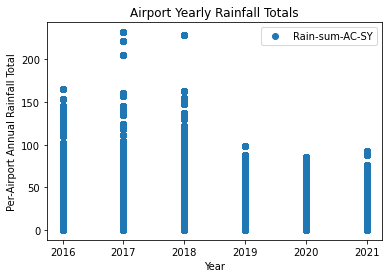

In [141]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'StartYear', y='Rain-sum-AC-SY',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Airport Yearly Rainfall Totals')  
plt.xlabel('Year')  
plt.ylabel('Per-Airport Annual Rainfall Total')  
plt.show()

In [142]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['StartYear'].values.reshape(-1,1)
y = df['Rain-sum-AC-SY'].values.reshape(-1,1)

In [143]:
X

array([[2016],
       [2016],
       [2016],
       ...,
       [2021],
       [2021],
       [2021]])

In [144]:
y

array([[17.2],
       [17.2],
       [17.2],
       ...,
       [ 0. ],
       [ 0. ],
       [ 0. ]])

In [145]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Run the Regression Analysis:  Time ('StartYear') vs. Yearly Airport Rainfall Totals ('Rain-sum-AC-SY')

In [146]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [147]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [148]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

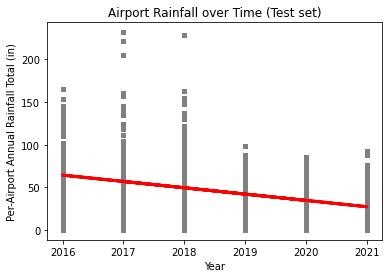

In [149]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Airport Rainfall over Time (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('Per-Airport Annual Rainfall Total (in)')
plot_test.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.4-LinearRegression-TestSet-TIME.png'), facecolor='white', bbox_inches='tight')
plot_test.show()

In [150]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [151]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.41994959]]
Mean squared error:  1183.783656229788
R2 score:  0.1208210077091888


## This model does not work well here.  No big surprise, given the wide range of scatter among the data points, but it's also possible that the rainfall amounts at a majority of airports aren't decreasing after all, and that what we're really seeing here is a tighter grouping over time.

In [152]:
y_predicted

array([[34.61313921],
       [49.45303839],
       [49.45303839],
       ...,
       [42.0330888 ],
       [56.87298798],
       [56.87298798]])

In [153]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,60.19,34.613139
1,37.60,49.453038
2,62.17,49.453038
3,36.64,56.872988
4,71.82,64.292938
5,16.84,56.872988
6,40.35,49.453038
7,100.56,64.292938
8,61.16,64.292938
9,59.58,27.193190


## Compare how well (or poorly) the regression fits the training set.

In [154]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [155]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [156]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-7.41994959]]
Mean squared error:  1175.3903170729302
R2 score:  0.11986923187892895


## The model also performs poorly here on the training set, with about the same performance as on the test set.

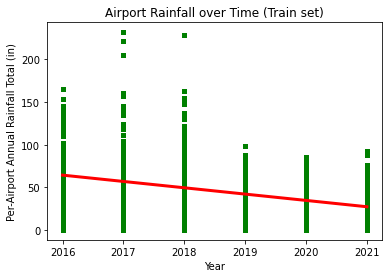

In [157]:
# Visualizing the training set results.

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_train.title('Airport Rainfall over Time (Train set)')
plot_train.xlabel('Year')
plot_train.ylabel('Per-Airport Annual Rainfall Total (in)')
plot_train.savefig(os.path.join(path, '04-Analysis', 'Visualizations', 'task-6.4-LinearRegression-TrainSet-TIME.png'), facecolor='white', bbox_inches='tight')
plot_train.show()

In [158]:
df.shape

(515813, 34)

In [159]:
# We've made no changes to our dataframe, so there is no need to save here.
# The visualizations show us nothing we don't see in another notebook, either.